In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('CombinedGmap.csv')
df

,openingHours/0/day,openingHours/0/hours,openingHours/1/day,openingHours/1/hours,openingHours/2/day,openingHours/2/hours,openingHours/3/day,openingHours/3/hours,openingHours/4/day,openingHours/4/hours,...,address,reviewsCount,totalScore,price,description,state,title,categoryName,countryCode,location
0,Monday,Open 24 hours,Tuesday,Open 24 hours,Wednesday,Open 24 hours,Thursday,Open 24 hours,Friday,Open 24 hours,...,"Q8RH+P2C, Jalan Raya, Sukawana, Kintamani, Ban...",956,4.7,NaN,NaN,Bali,Pura Puncak Penulisan,NaN,NaN,NaN
1,Monday,9 AM to 6 PM,Tuesday,9 AM to 6 PM,Wednesday,9 AM to 6 PM,Thursday,9 AM to 6 PM,Friday,9 AM to 6 PM,...,"Jl. Raya Pengosekan Ubud, Ubud, Kecamatan Ubud...",1111,4.5,NaN,Art museum exhibiting traditional & contempora...,Bali,Agung Rai Museum of Art,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"75G9+MWV, Jl. Pantai Kuta, Kuta, Kec. Kuta, Ka...",272,4.4,NaN,Beachfront base of island environmental group ...,Bali,Bali Sea Turtle Society,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Br. Batusesa, Candikuning, Baturiti, Tabanan R...",4124,4.6,NaN,NaN,Bali,The Blooms Garden,NaN,NaN,NaN
4,Monday,7 AM to 8 PM,Tuesday,7 AM to 8 PM,Wednesday,7 AM to 8 PM,Thursday,7:30 AM to 5 PM,Friday,7:30 AM to 8 PM,...,"Subagan, Karangasem, Karangasem Regency, Bali ...",867,3.8,NaN,NaN,Bali,Bali Chocolate Factory,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Monday,6 AM to 10 PM,Tuesday,6 AM to 10 PM,Wednesday,6 AM to 10 PM,Thursday,6 AM to 10 PM,Friday,6 AM to 10 PM,...,Kapas lor 1G 2C.Selisih 1 Rumah dari Pukesmas ...,2,5.0,NaN,NaN,East Java,KOS VITRI CABANG 2,Vacation home rental agency,NaN,NaN
531,Monday,8:30 AM to 4:30 PM,Tuesday,8:30 AM to 4:30 PM,Wednesday,8:30 AM to 4:30 PM,Thursday,8:30 AM to 4:30 PM,Friday,8:30 AM to 4:30 PM,...,"Jl. R.A Kartini No.123 D, DR. Soetomo, Kec. Te...",7,5.0,NaN,NaN,East Java,Infinite Vacation,Travel agency,NaN,NaN
532,Monday,10 AM to 5:30 PM,Tuesday,10 AM to 5:30 PM,Wednesday,10 AM to 5:30 PM,Thursday,10 AM to 5:30 PM,Friday,10 AM to 5:30 PM,...,"Jl. Tidar No.20A Lantai 2, RT.003/RW.07, Sawah...",1,3.0,NaN,NaN,East Java,WIJAYA VACATION,Travel agency,NaN,NaN
533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jl. Kalikepiting Jaya IX No.41 016, RT.016/RW....",0,NaN,NaN,NaN,East Java,Vacation Journey,Indoor lodging,NaN,NaN


In [3]:
print(df.columns)

Index(['openingHours/0/day', 'openingHours/0/hours', 'openingHours/1/day',
       'openingHours/1/hours', 'openingHours/2/day', 'openingHours/2/hours',
       'openingHours/3/day', 'openingHours/3/hours', 'openingHours/4/day',
       'openingHours/4/hours', 'openingHours/5/day', 'openingHours/5/hours',
       'openingHours/6/day', 'openingHours/6/hours', 'images', 'city',
       'location/lat', 'location/lng', 'categories/0', 'categories/1',
       'categories/2', 'categories/3', 'categories/4', 'categories/5',
       'categories/6', 'categories/7', 'categories/8', 'phone', 'address',
       'reviewsCount', 'totalScore', 'price', 'description', 'state', 'title',
       'categoryName', 'countryCode', 'location'],
      dtype='object')


In [4]:
# Assume df is your DataFrame containing the 'categories' columns
categories_columns = ['categories/0', 'categories/1', 'categories/2', 'categories/3', 
                      'categories/4', 'categories/5', 'categories/6', 'categories/7', 
                      'categories/8']

# Combine all categories into one new column
df['categories'] = df.apply(lambda row: ' '.join(str(row[col]) for col in categories_columns if pd.notnull(row[col])), axis=1)

# Drop the individual 'categories' columns
df.drop(columns=categories_columns, inplace=True)


In [5]:
# Define the columns containing day and hours information
day_columns = ['openingHours/0/day', 'openingHours/1/day', 'openingHours/2/day', 
               'openingHours/3/day', 'openingHours/4/day', 'openingHours/5/day', 
               'openingHours/6/day']
hours_columns = ['openingHours/0/hours', 'openingHours/1/hours', 'openingHours/2/hours', 
                 'openingHours/3/hours', 'openingHours/4/hours', 'openingHours/5/hours', 
                 'openingHours/6/hours']

# Combine day and hours information into one new column
df['combined_opening_hours'] = df.apply(lambda row: ' '.join(f"{row[day]} {row[hours]},"
                                                              if not pd.isnull(row[day]) else ''
                                                              for day, hours in zip(day_columns, hours_columns)), 
                                         axis=1)

# Drop the individual 'day' and 'hours' columns
df.drop(columns=day_columns + hours_columns, inplace=True)

In [6]:
df

,images,city,location/lat,location/lng,phone,address,reviewsCount,totalScore,price,description,state,title,categoryName,countryCode,location,categories,combined_opening_hours
0,NaN,Bangli Regency,-8.208182,115.327521,NaN,"Q8RH+P2C, Jalan Raya, Sukawana, Kintamani, Ban...",956,4.7,NaN,NaN,Bali,Pura Puncak Penulisan,NaN,NaN,NaN,Hindu temple Tourist attraction,"Monday Open 24 hours, Tuesday Open 24 hours, W..."
1,NaN,Gianyar Regency,-8.522814,115.263757,+62 361 976659,"Jl. Raya Pengosekan Ubud, Ubud, Kecamatan Ubud...",1111,4.5,NaN,Art museum exhibiting traditional & contempora...,Bali,Agung Rai Museum of Art,NaN,NaN,NaN,Art museum Museum Tourist attraction,"Monday 9 AM to 6 PM, Tuesday 9 AM to 6 PM, Wed..."
2,NaN,Badung Regency,-8.723268,115.169805,+62 811-3882-683,"75G9+MWV, Jl. Pantai Kuta, Kuta, Kec. Kuta, Ka...",272,4.4,NaN,Beachfront base of island environmental group ...,Bali,Bali Sea Turtle Society,NaN,NaN,NaN,Non-profit organization Conservation departmen...,
3,NaN,Tabanan Regency,-8.302095,115.158773,+62 821-4520-0103,"Br. Batusesa, Candikuning, Baturiti, Tabanan R...",4124,4.6,NaN,NaN,Bali,The Blooms Garden,NaN,NaN,NaN,Tourist attraction Hotel Restaurant Villa,
4,NaN,Karangasem Regency,-8.483013,115.617342,+62 878-6009-5999,"Subagan, Karangasem, Karangasem Regency, Bali ...",867,3.8,NaN,NaN,Bali,Bali Chocolate Factory,NaN,NaN,NaN,Tourist attraction Event ticket seller,"Monday 7 AM to 8 PM, Tuesday 7 AM to 8 PM, Wed..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,NaN,Surabaya,-7.242472,112.764074,+62 855-3693-0624,Kapas lor 1G 2C.Selisih 1 Rumah dari Pukesmas ...,2,5.0,NaN,NaN,East Java,KOS VITRI CABANG 2,Vacation home rental agency,NaN,NaN,Vacation home rental agency,"Monday 6 AM to 10 PM, Tuesday 6 AM to 10 PM, W..."
531,NaN,Surabaya,-7.278716,112.733048,+62 31 5682388,"Jl. R.A Kartini No.123 D, DR. Soetomo, Kec. Te...",7,5.0,NaN,NaN,East Java,Infinite Vacation,Travel agency,NaN,NaN,Travel agency,"Monday 8:30 AM to 4:30 PM, Tuesday 8:30 AM to ..."
532,NaN,Surabaya,-7.257885,112.732266,+62 31 99246060,"Jl. Tidar No.20A Lantai 2, RT.003/RW.07, Sawah...",1,3.0,NaN,NaN,East Java,WIJAYA VACATION,Travel agency,NaN,NaN,Travel agency,"Monday 10 AM to 5:30 PM, Tuesday 10 AM to 5:30..."
533,NaN,Surabaya,-7.261511,112.768591,+62 31 9999992,"Jl. Kalikepiting Jaya IX No.41 016, RT.016/RW....",0,NaN,NaN,NaN,East Java,Vacation Journey,Indoor lodging,NaN,NaN,Indoor lodging,


In [7]:
null_counts = df.isnull().sum()

# Get the column names with more than 450 null values
columns_to_drop = null_counts[null_counts > 450].index

# Drop the columns with more than 450 null values
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df = df.drop(['categoryName'], axis=1)

In [9]:
print(df.isnull().sum())

city                        8
location/lat                1
location/lng                1
phone                     205
address                     8
reviewsCount                0
totalScore                103
state                       8
title                       0
categories                  0
combined_opening_hours      0
dtype: int64


In [10]:
df.dropna(subset=['city','location/lat','location/lng','address','state'], how='all', inplace=True)

In [11]:
print(df.isnull().sum())

city                        7
location/lat                0
location/lng                0
phone                     205
address                     7
reviewsCount                0
totalScore                102
state                       7
title                       0
categories                  0
combined_opening_hours      0
dtype: int64


In [12]:
df['phone'].fillna('Unknown', inplace=True)


/var/folders/fq/cnng5zxd5l57yln0l0m6wnrc0000gn/T/ipykernel_37101/2793249040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['phone'].fillna('unknown', inplace=True)


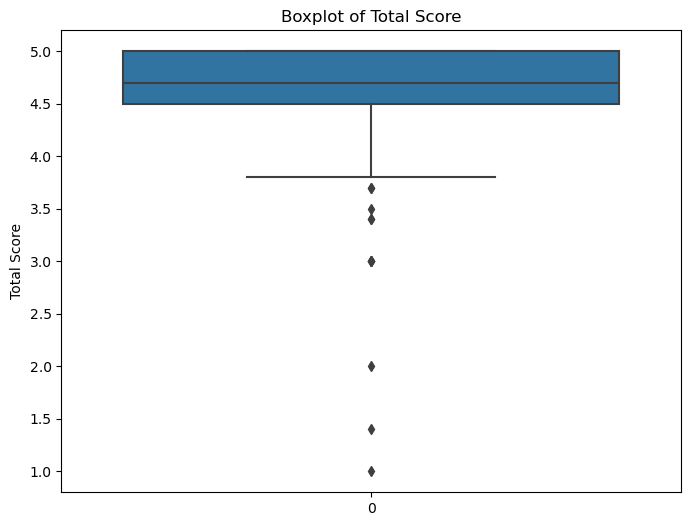

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of the 'totalScore' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(data=df['totalScore'].dropna())  # Plot the boxplot, dropna() to remove NaN values
plt.title('Boxplot of Total Score')
plt.ylabel('Total Score')
plt.show()


In [14]:
# Calculate the median of the 'totalScore' column
total_score_median = df['totalScore'].median()

# Fill NaN values in the 'totalScore' column with the median
df['totalScore'].fillna(total_score_median, inplace=True)

/var/folders/fq/cnng5zxd5l57yln0l0m6wnrc0000gn/T/ipykernel_37101/3862160491.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalScore'].fillna(total_score_median, inplace=True)


In [15]:
# Replace NaN values in the 'address' column with an empty string
df['address'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)
df['state'].fillna('Unknown', inplace=True)

/var/folders/fq/cnng5zxd5l57yln0l0m6wnrc0000gn/T/ipykernel_37101/1327785488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['address'].fillna('Unknown', inplace=True)
/var/folders/fq/cnng5zxd5l57yln0l0m6wnrc0000gn/T/ipykernel_37101/1327785488.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [16]:
# Create a boolean mask to identify rows where 'address', 'city', and 'state' are 'Unknown'
mask = (df['address'] == 'Unknown') & (df['city'] == 'Unknown') & (df['state'] == 'Unknown')

# Filter the DataFrame to exclude rows where all three columns are 'Unknown'
df = df[~mask]

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

In [17]:
print(df.isnull().sum())

city                      0
location/lat              0
location/lng              0
phone                     0
address                   0
reviewsCount              0
totalScore                0
state                     0
title                     0
categories                0
combined_opening_hours    0
dtype: int64


In [18]:
# Check unique values in the specified columns
print("Unique values in 'city':", df['city'].unique())
print("Unique values in 'location/lat':", df['location/lat'].unique())
print("Unique values in 'location/lng':", df['location/lng'].unique())
print("Unique values in 'address':", df['address'].unique())
print("Unique values in 'state':", df['state'].unique())

Unique values in 'city': ['Bangli Regency' 'Gianyar Regency' 'Badung Regency' 'Tabanan Regency'
 'Karangasem Regency' 'Denpasar City' 'Kuta Utara' 'Bali'
 'Klungkung Regency' 'Seminyak' 'Legian' 'Jembrana Regency'
 'Buleleng Regency' 'Denpasar' 'Bandung City' 'Bandung Regency'
 'Malang City' 'Malang Regency' 'Pasuruan Regency' 'Semarang City'
 'Surabaya']
Unique values in 'location/lat': [-8.2081822 -8.5228143 -8.7232678 -8.3020948 -8.4830133 -8.4949388
 -8.6452883 -8.8063766 -8.6596957 -8.6400906 -8.8065662 -8.8435204
 -8.6389491 -8.641528  -8.6454498 -8.693451  -8.6321346 -8.8063019
 -8.8372114 -8.6388829 -8.625344  -8.8088467 -8.6364561 -8.681926
 -8.6518237 -8.8219318 -8.8200695 -8.8128275 -8.6766476 -8.8092824
 -8.6942847 -8.8258177 -8.814393  -8.8076239 -8.6814133 -8.8056854
 -8.8316569 -8.6858821 -8.6936013 -8.694636  -8.697328  -8.8075436
 -8.693372  -8.809598  -8.6886639 -8.6888974 -8.6889509 -8.8075993
 -8.6943191 -8.8425675 -8.81609   -8.6944319 -8.8256848 -8.6893961
 -8.809

In [19]:
df

,city,location/lat,location/lng,phone,address,reviewsCount,totalScore,state,title,categories,combined_opening_hours
0,Bangli Regency,-8.208182,115.327521,unknown,"Q8RH+P2C, Jalan Raya, Sukawana, Kintamani, Ban...",956,4.7,Bali,Pura Puncak Penulisan,Hindu temple Tourist attraction,"Monday Open 24 hours, Tuesday Open 24 hours, W..."
1,Gianyar Regency,-8.522814,115.263757,+62 361 976659,"Jl. Raya Pengosekan Ubud, Ubud, Kecamatan Ubud...",1111,4.5,Bali,Agung Rai Museum of Art,Art museum Museum Tourist attraction,"Monday 9 AM to 6 PM, Tuesday 9 AM to 6 PM, Wed..."
2,Badung Regency,-8.723268,115.169805,+62 811-3882-683,"75G9+MWV, Jl. Pantai Kuta, Kuta, Kec. Kuta, Ka...",272,4.4,Bali,Bali Sea Turtle Society,Non-profit organization Conservation departmen...,
3,Tabanan Regency,-8.302095,115.158773,+62 821-4520-0103,"Br. Batusesa, Candikuning, Baturiti, Tabanan R...",4124,4.6,Bali,The Blooms Garden,Tourist attraction Hotel Restaurant Villa,
4,Karangasem Regency,-8.483013,115.617342,+62 878-6009-5999,"Subagan, Karangasem, Karangasem Regency, Bali ...",867,3.8,Bali,Bali Chocolate Factory,Tourist attraction Event ticket seller,"Monday 7 AM to 8 PM, Tuesday 7 AM to 8 PM, Wed..."
...,...,...,...,...,...,...,...,...,...,...,...
522,Surabaya,-7.242472,112.764074,+62 855-3693-0624,Kapas lor 1G 2C.Selisih 1 Rumah dari Pukesmas ...,2,5.0,East Java,KOS VITRI CABANG 2,Vacation home rental agency,"Monday 6 AM to 10 PM, Tuesday 6 AM to 10 PM, W..."
523,Surabaya,-7.278716,112.733048,+62 31 5682388,"Jl. R.A Kartini No.123 D, DR. Soetomo, Kec. Te...",7,5.0,East Java,Infinite Vacation,Travel agency,"Monday 8:30 AM to 4:30 PM, Tuesday 8:30 AM to ..."
524,Surabaya,-7.257885,112.732266,+62 31 99246060,"Jl. Tidar No.20A Lantai 2, RT.003/RW.07, Sawah...",1,3.0,East Java,WIJAYA VACATION,Travel agency,"Monday 10 AM to 5:30 PM, Tuesday 10 AM to 5:30..."
525,Surabaya,-7.261511,112.768591,+62 31 9999992,"Jl. Kalikepiting Jaya IX No.41 016, RT.016/RW....",0,4.7,East Java,Vacation Journey,Indoor lodging,
